The goal of this notebook is to calculate the optimal cut-off value for output of logistic sigmoid function (interpreted as probability...)

In [1]:
import pandas as pd
import requests
from sklearn.metrics import f1_score, precision_score, recall_score

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', None)

Validation is the label assigned by the curator. Notes are comments optionally provided by the curator.

In [2]:
curator_labeled = pd.read_csv('curator_results_comparison_orphanet.csv')

In [3]:
curator_labeled.tail()

,PMID,Title,Abs,Validation,Notes,preds,probs
92,25205112,"Mutation of SLC9A1, encoding the major Na‚Å∫/H‚Å∫ exchanger, causes ataxia-deafness Lichtenstein-Knorr syndrome.","Lichtenstein-Knorr syndrome is an autosomal recessive condition that associates sensorineural hearing loss and cerebellar ataxia. Here, we report the first identification of a gene involved in Lichtenstein-Knorr syndrome. By using a combination of homozygosity mapping and whole-exome sequencing, we identified the homozygous p.Gly305Arg missense mutation in SLC9A1 that segregates with the disease in a large consanguineous family. Mutant glycine 305 is a highly conserved amino acid present in the eighth transmembrane segment of all metazoan orthologues of NHE1, the Na(+)/H(+) exchanger 1, encoded by SLC9A1. We demonstrate that the p.Gly305Arg mutation causes the near complete de-glycosylation, mis-targeting and loss of proton pumping activity of NHE1. The comparison of our family with the phenotypes of spontaneous and knockout Slc9a1 murine models demonstrates that the association between ataxia and hearing loss is caused by complete or near complete loss of function of NHE1 and altered regulation of pHi in the central nervous system.",0,NaN,0,0.013222
93,8929507,Hereditary neurocutaneous angiomatosis. Report of four cases.,"The authors report the coexistence of vascular nevi (hemangiomas and arteriovenous malformations (AVMs) of the skin) with AVMs and venous malformations of the brain in male siblings from two related but nonconsanguineous families of three generations. The proband, his siblings, parents, aunts, uncles, and cousins were examined, underwent magnetic resonance (MR) imaging and MR angiography, and when appropriate, cerebral angiography. A father had vascular nevi and a mother, his sister, had an azygos anterior cerebral artery. No other cutaneous or cerebrovascular malformations were present in the parents. Each of the two families had two boys and one girl, 9 to 18 years of age. All the children had vascular nevi and all of the boys had coexisting cerebrovascular malformations: AVMs in three, and a venous malformation in another. One boy had three cerebral AVMs. Two boys had a cerebral hemorrhage, and one also had focal motor seizures. The skin lesions were not those of the Sturge-Weber-Dimitri, Rendu-Osler-Weber, or Wybum-Mason syndromes. The association of cutaneous and cerebrovascular malformations was seen only in males in these families. but females have also been reported in the literature. The results obtained in these families and three other families reported from Western and Central Europe indicate that the association of cerebral and cutaneous vascular hamartomas constitutes a distinct, hereditary clinicopathological entity with autosomal dominant inheritance and variable penetrance. The clinical manifestations of this syndrome are visible, painful vascular nevi, epilepsy, cerebral hemorrhage, and focal neurological deficits. The preponderance of male patients with the full expression of the syndrome suggests a possible hormonal influence on the expression of the gene.",0,NaN,0,0.018127
94,27280374,"Acromegaly incidence, prevalence, complications and long-term prognosis: a nationwide cohort study.","Valid data on acromegaly incidence, complications and mortality are scarce. The Danish Health Care System enables nationwide studies with complete follow-up and linkage among health-related databases to assess acromegaly incidence, prevalence, complications and mortality in a population-based cohort study.All incident cases of acromegaly in Denmark (1991-2010) were identified from health registries and validated by chart review. We estimated the annual incidence rate of acromegaly per 10(6) person-years (py) with 95% confidence intervals (95% CIs). For every patient, 10 persons were sampled from the general population as a comparison cohort. Cox regression and hazard ratios (HRs) with 95% confidence intervals (95% CIs) were used.Mean ag

Extract the standardized labels, predictions, and probabilities from the dataset in order to calculate precision, recall, F1 score

In [4]:
curator_labeled[['Validation', 'preds']] = (curator_labeled[['Validation', 'preds']] == True).astype(int)
labels = list(curator_labeled['Validation'])
predictions = list(curator_labeled['preds'])
probs = list(curator_labeled['probs'])

In [5]:
print('Scores at probability 0.5 cutoff')
print(precision_score(labels, predictions))
print(recall_score(labels, predictions))
print(f1_score(labels, predictions))

Scores at probability 0.5 cutoff
0.8
0.5454545454545454
0.6486486486486486


Changed precision, recall, F1 score to [binary](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score) from macro average

In [6]:
F1array = []
Precisionarray =[]
Recallarray =[]
Cutoffarray = [float(i/1000) for i in range(20,990)]
for cutoff in Cutoffarray:
    preds = [1 if j>cutoff else 0 for j in probs]
    f1 = f1_score(labels, preds)
    precision = precision_score(labels, preds)
    recall = recall_score(labels, preds)
    F1array.append(f1)
    Precisionarray.append(precision)
    Recallarray.append(recall)

In [7]:
print(len(F1array),len(Precisionarray),len(Recallarray),len(Cutoffarray))

970 970 970 970


In [8]:
max_value = max(F1array)
max_index = F1array.index(max_value)
cutoff = Cutoffarray[max_index]
print('F1 is',max_value,'at cutoff',cutoff)
print('Precision is',Precisionarray[max_index],'at cutoff',cutoff)
print('Recall is',Recallarray[max_index],'at cutoff',cutoff)

print('\nF1 is',F1array[Cutoffarray.index(0.5)],'at cutoff',0.5)

F1 is 0.7228915662650602 at cutoff 0.032
Precision is 0.7692307692307693 at cutoff 0.032
Recall is 0.6818181818181818 at cutoff 0.032

F1 is 0.6486486486486486 at cutoff 0.5


Note that this test set is extremely small

In [9]:
maxprecision = max(Precisionarray)
max_precision_idx = Precisionarray.index(maxprecision)
precision_cutoff = Cutoffarray[max_precision_idx]

print('F1 is',F1array[max_precision_idx],'at cutoff',precision_cutoff)
print('Precision is',maxprecision,'at cutoff',precision_cutoff)
print('Recall is',Recallarray[max_precision_idx],'at cutoff',precision_cutoff)

F1 is 0.5 at cutoff 0.988
Precision is 0.9375 at cutoff 0.988
Recall is 0.3409090909090909 at cutoff 0.988


In [10]:
maxrecall = max(Recallarray)
max_recall_idx = Recallarray.index(maxrecall)
recall_cutoff = Cutoffarray[max_recall_idx]

print('F1 is',F1array[max_recall_idx],'at cutoff',recall_cutoff)
print('Precision is',maxrecall,'at cutoff',recall_cutoff)
print('Recall is',Recallarray[max_recall_idx],'at cutoff',recall_cutoff)

F1 is 0.6601941747572816 at cutoff 0.02
Precision is 0.7727272727272727 at cutoff 0.02
Recall is 0.7727272727272727 at cutoff 0.02


In [11]:
import matplotlib.pyplot as plt

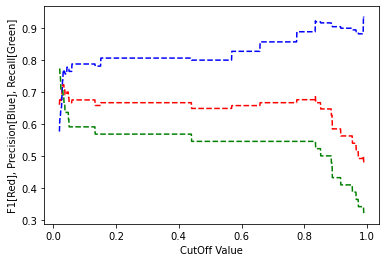

In [12]:
# red dashes, blue squares and green triangles
plt.plot(Cutoffarray, F1array, 'r--', Cutoffarray, Precisionarray, 'b--', Cutoffarray, Recallarray, 'g--')
plt.ylabel('F1[Red], Precision[Blue], Recall[Green]')
plt.xlabel('CutOff Value')
plt.show()

In [13]:
fig = plt.figure()
fig.savefig('F1[Red], Precision[Blue], Recall[Green] by cut off.png', dpi=400, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>